In [2]:
import s3fs
import intake
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

## Catalog Loading and data exploration

In [3]:
# Open catalog and store as 'catalog'
catalog = intake.open_esm_datastore('https://cmip6-pds.s3.amazonaws.com/pangeo-cmip6.json')

In [4]:
# View catalog
catalog

,unique
activity_id,18
institution_id,36
source_id,88
experiment_id,170
member_id,657
table_id,37
variable_id,709
grid_label,10
zstore,522217
dcpp_init_year,60


In [5]:
# Convert the catalog to a Pandas dataframe
cat_df = catalog.df

In [6]:
# View unique CMIP6 activities
catalog.df.source_id.unique()

array(['CMCC-CM2-HR4', 'EC-Earth3P-HR', 'HadGEM3-GC31-MM',
       'HadGEM3-GC31-HM', 'HadGEM3-GC31-LM', 'EC-Earth3P', 'ECMWF-IFS-LR',
       'ECMWF-IFS-HR', 'HadGEM3-GC31-LL', 'CMCC-CM2-VHR4', 'GFDL-CM4',
       'GFDL-AM4', 'IPSL-CM6A-LR', 'E3SM-1-0', 'CNRM-CM6-1', 'GFDL-ESM4',
       'GFDL-CM4C192', 'GFDL-ESM2M', 'GFDL-OM4p5B', 'GISS-E2-1-G',
       'GISS-E2-1-H', 'CNRM-ESM2-1', 'BCC-CSM2-MR', 'BCC-ESM1', 'MIROC6',
       'AWI-CM-1-1-MR', 'EC-Earth3-LR', 'IPSL-CM6A-ATM-HR', 'CESM2',
       'CESM2-WACCM', 'CNRM-CM6-1-HR', 'MRI-ESM2-0', 'CanESM5',
       'SAM0-UNICON', 'GISS-E2-1-G-CC', 'UKESM1-0-LL', 'EC-Earth3',
       'EC-Earth3-Veg', 'FGOALS-f3-L', 'CanESM5-CanOE', 'INM-CM4-8',
       'INM-CM5-0', 'NESM3', 'MPI-ESM-1-2-HAM', 'CAMS-CSM1-0',
       'MPI-ESM1-2-LR', 'MPI-ESM1-2-HR', 'MRI-AGCM3-2-H', 'MRI-AGCM3-2-S',
       'MCM-UA-1-0', 'INM-CM5-H', 'KACE-1-0-G', 'NorESM2-LM',
       'FGOALS-f3-H', 'FGOALS-g3', 'MIROC-ES2L', 'FIO-ESM-2-0', 'NorCPM1',
       'NorESM1-F', 'MPI-ESM1-2-XR'

In [7]:
# Catalog search
res = catalog.search(activity_id = ["CMIP", "ScenarioMIP"], # Historical data and future projections
                     source_id = ["GFDL-CM4", "GFDL-ESM4"],
                     experiment_id = ["historical", "ssp370", "ssp585"],
                     table_id = "Amon", 
                     member_id = "r1i1p1f1",
                     variable_id = "tas")
# Display contents of the catalog
display(res.df)

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,ScenarioMIP,NOAA-GFDL,GFDL-CM4,ssp585,r1i1p1f1,Amon,tas,gr1,s3://cmip6-pds/CMIP6/ScenarioMIP/NOAA-GFDL/GFD...,NaN,20180701
1,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,Amon,tas,gr1,s3://cmip6-pds/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/h...,NaN,20180701
2,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp370,r1i1p1f1,Amon,tas,gr1,s3://cmip6-pds/CMIP6/ScenarioMIP/NOAA-GFDL/GFD...,NaN,20180701
3,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp585,r1i1p1f1,Amon,tas,gr1,s3://cmip6-pds/CMIP6/ScenarioMIP/NOAA-GFDL/GFD...,NaN,20180701
4,CMIP,NOAA-GFDL,GFDL-ESM4,historical,r1i1p1f1,Amon,tas,gr1,s3://cmip6-pds/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/...,NaN,20190726


In [8]:
# Specify search terms to query catalog for CanESM5 data
# activity_id: which project do you want? CMIP = historical data, ScenarioMIP = future projections
activity_ids = ['ScenarioMIP', 'CMIP'] 

# source_id: which model do you want? 
source_id = ['CanESM5']

# experiment_id: what experimental configuration do you want? Here we want historical and the four main SSPs
experiment_ids = ['historical', 'ssp126', 'ssp245', 'ssp370', 'ssp585']

# member_id: which ensemble member do you want? Here we want r10i1p1f1
member_id = 'r10i1p1f1'

# table_id: which part of the Earth system and time resolution do you want? Here we want monthly atmosphere data
table_id = 'Amon' 

# variable_id: which climate variable do you want? Here we want surface air temperature
variable_id = 'tas' 

In [9]:
# Search through catalog, store results in "res" variable
res = catalog.search(activity_id=activity_ids, source_id=source_id, experiment_id=experiment_ids, 
                     member_id=member_id, table_id=table_id, variable_id=variable_id)

# Display data frame associated with results
display(res.df)

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,CCCma,CanESM5,historical,r10i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/CMIP/CCCma/CanESM5/histor...,NaN,20190429
1,ScenarioMIP,CCCma,CanESM5,ssp585,r10i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/CCCma/CanESM5...,NaN,20190429
2,ScenarioMIP,CCCma,CanESM5,ssp370,r10i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/CCCma/CanESM5...,NaN,20190429
3,ScenarioMIP,CCCma,CanESM5,ssp126,r10i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/CCCma/CanESM5...,NaN,20190429
4,ScenarioMIP,CCCma,CanESM5,ssp245,r10i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/CCCma/CanESM5...,NaN,20190429


In [10]:
# Read in the historical data file for CM4
hist_data = xr.open_zarr(res.df["zstore"][0], storage_options = {"anon": True})

# Read in the high climate scenario data file for CM4
ssp585_data = xr.open_zarr(res.df["zstore"][1], storage_options = {"anon": True})

# Read in the low climate scenario data file for CM4
ssp370_data = xr.open_zarr(res.df["zstore"][2], storage_options = {"anon": True})

## Area of Interest
For my area of interest I have chosen to do the southeast United States. Being an area with such variable climate, I thought it would be interesting to see how the models interact with it. For the models, I chose the ones with more severe climate outcomes because I tend not to be super optimistic about where we are at in our climate change prevention actitivies.

In [11]:
# Define area of interest
lat_min, lat_max = 25.0, 37.5 
lon_min, lon_max = 270.0, 285.0 

In [12]:
# Concatenate historical and future projection data
canesm5_585_data = xr.concat([hist_data, ssp585_data], dim="time")
# Concatenate historical and future projection data
canesm5_370_data = xr.concat([hist_data, ssp370_data], dim="time")

In [13]:
# Convert time to datetime64 format
time = canesm5_585_data.time.astype('datetime64[ns]')
# Convert time to datetime64 format
time = canesm5_370_data.time.astype('datetime64[ns]')

In [17]:
# Define logical mask: True when lat/lon inside the valid ranges, False elsewhere
tas_SE_lat = (canesm5_585_data.lat >= lat_min) & (canesm5_585_data.lat <= lat_max)
tas_SE_lon = (canesm5_585_data.lon >= lon_min) & (canesm5_585_data.lon <= lon_max)

# Find points where the mask value is True, drop all other points
tas_SE_585 = canesm5_585_data.where(tas_SE_lat & tas_SE_lon, drop=True)

# Average over lat, lon dimensions to get a time series
tas_SE_585 = tas_SE.mean(dim=["lat", "lon"])

In [20]:
# Define logical mask: True when lat/lon inside the valid ranges, False elsewhere
tas_SE_lat = (canesm5_370_data.lat >= lat_min) & (canesm5_370_data.lat <= lat_max)
tas_SE_lon = (canesm5_370_data.lon >= lon_min) & (canesm5_370_data.lon <= lon_max)

# Find points where the mask value is True, drop all other points
tas_SE_370 = canesm5_370_data.where(tas_SE_lat & tas_SE_lon, drop=True)

# Average over lat, lon dimensions to get a time series
tas_SE_370 = tas_SE_370.mean(dim=["lat", "lon"])

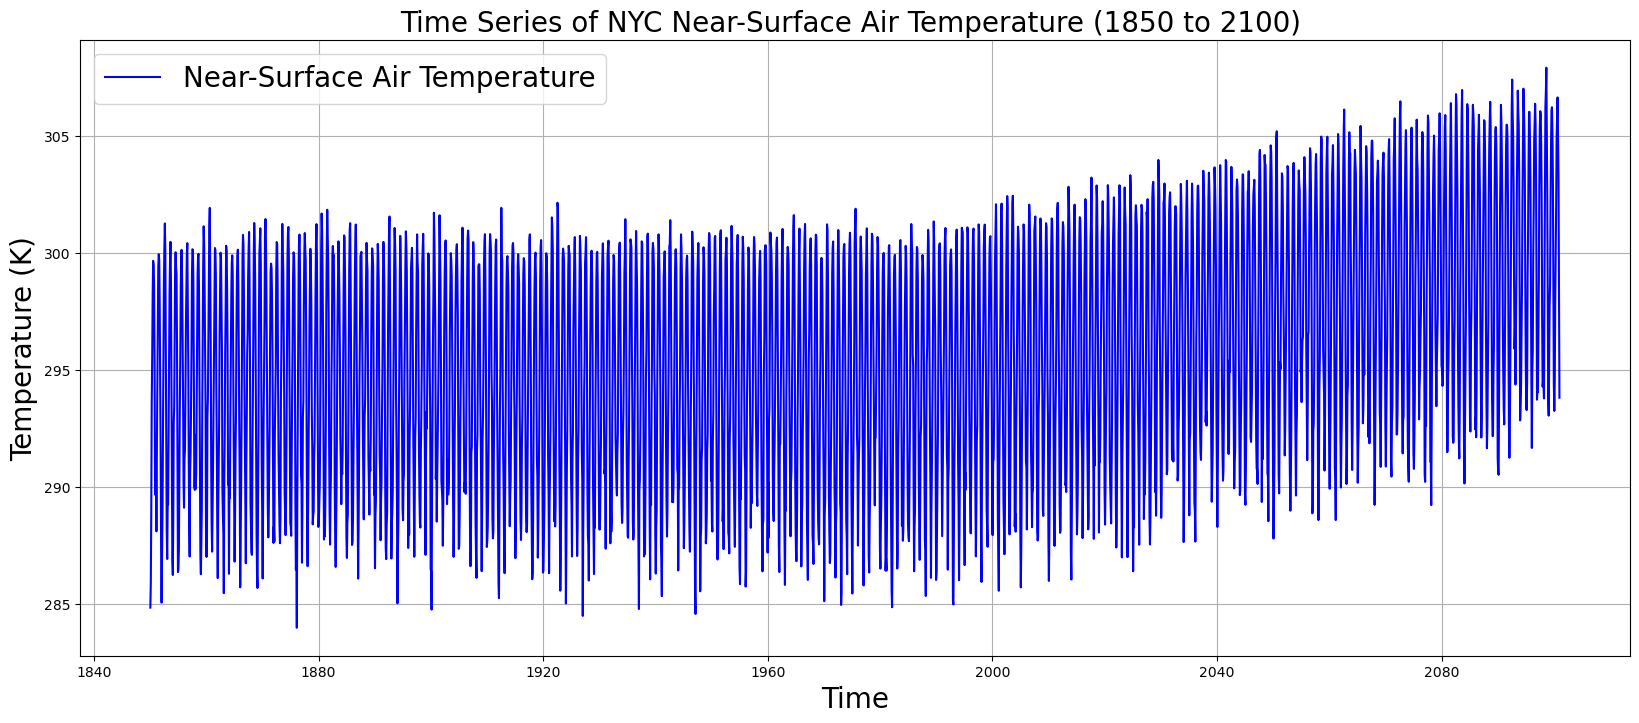

In [22]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(time, tas_SE.tas, label='Near-Surface Air Temperature', color='b')
ax.set_title("Time Series of NYC Near-Surface Air Temperature (1850 to 2100) ", fontsize=20)
ax.set_xlabel("Time", fontsize=20)
ax.set_ylabel("Temperature (K)", fontsize=20)
ax.legend(fontsize=20)
ax.grid()
plt.show()

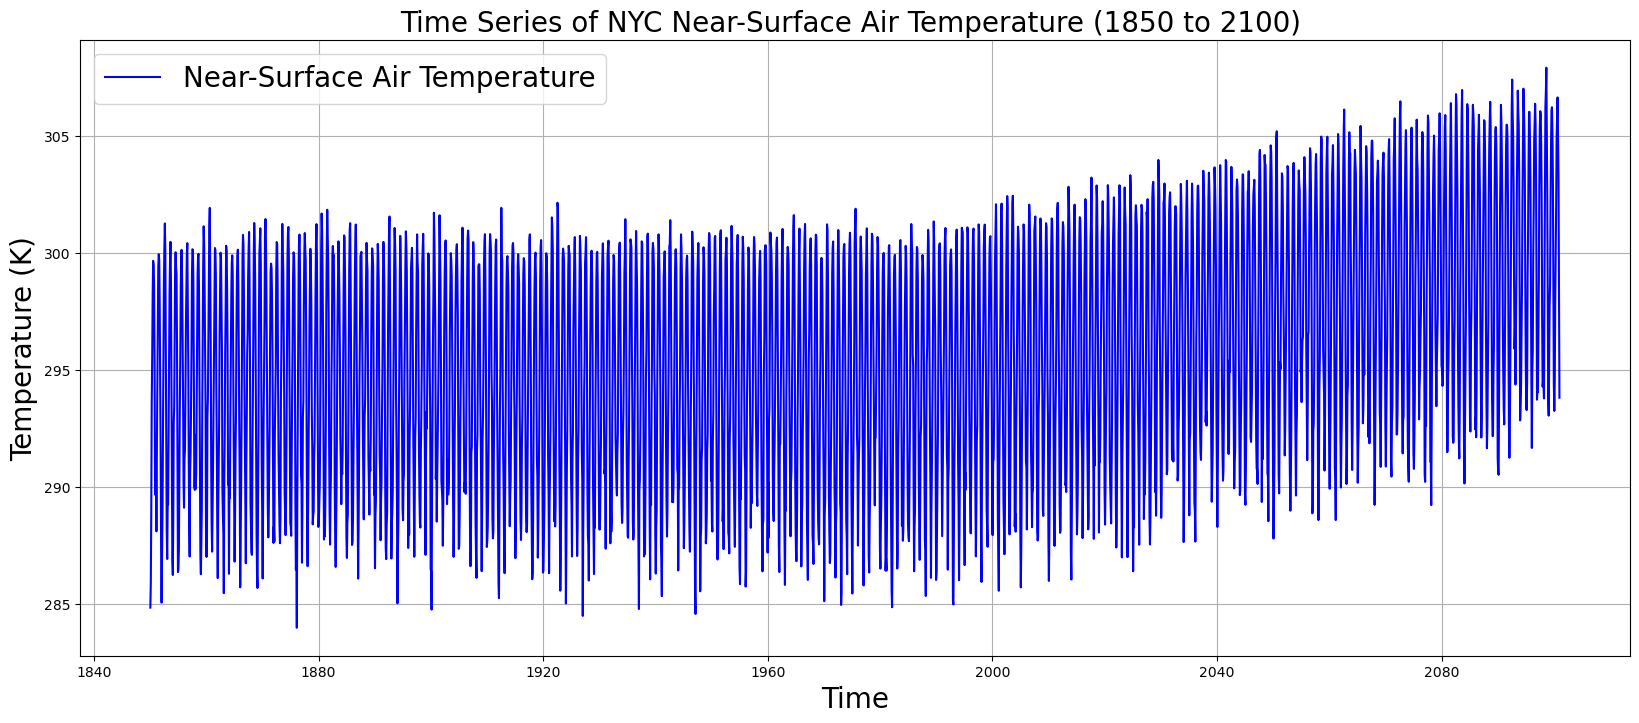

In [21]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(time, tas_SE_370.tas, label='Near-Surface Air Temperature', color='b')
ax.set_title("Time Series of NYC Near-Surface Air Temperature (1850 to 2100) ", fontsize=20)
ax.set_xlabel("Time", fontsize=20)
ax.set_ylabel("Temperature (K)", fontsize=20)
ax.legend(fontsize=20)
ax.grid()
plt.show()